# TIM - TP5 : Morphologie Mathématique

Aujourd'hui, place à la morphologie mathématique. C'est avant tout un ensemble de methodes pour le traitement de la forme des objets dans une image. L'objectif principal de cette famille d'algorithme (dans le cadre du post-traitement) est de supprimer le bruit introduit par des opérations de segmentation. On utilise donc souvent un algorithme MM en traitement ou en post-traitement.

## Ex. 0 : Quelques préparatifs avant le développement

Chargez l'image noisy_yin_yang.png en niveaux de gris, à télécharger sur Moodle et à insérer dans votre base d'images.

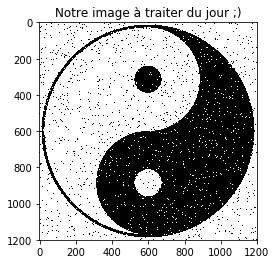

In [2]:
# A compléter
# Chargement des librairies
import cv2
from matplotlib import pyplot as plt
import numpy as np
import itertools
from scipy.ndimage.interpolation import shift
from utils import chronometrer,afficher

# Définition du chemin de la base d'images
path_base = '../Base_images/'

# Chargement de l'image et affichage
yinyang = cv2.imread(path_base+'noisy_yin_yang.png',-1)
afficher(yinyang,'gray','Notre image à traiter du jour ;)')

Dans le cadre de la morphologie mathématique, il nous faut obligatoirement ce qu'on appelle un élément structurant ou kernel. C'est un tableau/masque binaire qui sera appliqué sur notre image à traiter en fonction de l'algorithme utilisé. Plusieurs tailles et formes de kernel existent ici. Au lieu de les fabriquer nous même, on va utiliser une superbe fonction d'OpenCV : getStructuringElement.

Avec cette fonction, construisez et affichez :
- Un kernel rectangulaire 5X5
- Un kernel elliptique 7X7
- Un kernel en croix 3x3
- Un kernel rectangulaire 3X11

<Figure size 432x288 with 0 Axes>

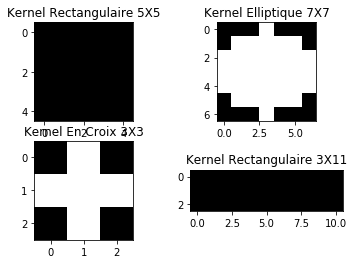

In [3]:
# A compléter
# Construction et affichage des kernels

plt.figure()

# Création d'un kernel rectangulaire 5X5
kernel_rect_5_5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

# Création d'un kernel elliptique 7X7
kernel_ellipse_7_7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

# Création d'un kernel en croix 3X3
kernel_cross_3_3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# Création d'un kernel rectangulaire 11X3
kernel_rect_11_3 = cv2.getStructuringElement(cv2.MORPH_RECT,(11,3))

afficher([kernel_rect_5_5,kernel_ellipse_7_7,kernel_cross_3_3,kernel_rect_11_3],'gray',subplots=(2,2),
        titres=['Kernel Rectangulaire 5X5','Kernel Elliptique 7X7','Kernel En Croix 3X3','Kernel Rectangulaire 3X11'])

## Ex. 1 : Développement des algorithmes de Morphologie Mathématique

**1.**

Commençons d'abord avec l'érosion. Dans le cadre des images binaires (notre cas ;) ), l'érosion d'une image I par un kernel K consiste en l'opération suivante :
                            
$ {\epsilon}_K(I) = \{ x|K_{x} \subset I \}$

C'est-à-dire, l'ensemble des points x tels que K soit totalement inclus dans I avec K centré en x.

Dans ce principe, développez la fonction d'érosion d'une image I par un kernel K.

In [4]:
# A compléter
# Implémentation de la fonction d'érosion

def erosion(I,K):
    height,width = I.shape
    k_height,k_width = K.shape
    output = np.zeros((height,width),dtype=np.uint8)
    I_extended = np.zeros((height+k_height-1,width+k_width-1),dtype=np.uint8)
    I_extended[k_height//2:k_height//2+height,k_width//2:width+k_width//2]=I
    for i in range(height):
        for j in range(width):
            imagette = I_extended[i:k_height+i,j:k_width+j]
            output[i,j] = np.all(imagette[K.astype(np.bool)])
    return output

def erosion_faster(I,K):
    return np.all(np.stack([shift(I,(i-K.shape[0]//2,j-K.shape[1]//2),cval=np.NaN) for i,j in itertools.product(range(K.shape[0]),range(K.shape[1]))])[K.astype(np.bool).reshape(-1),:,:].astype(np.bool),axis=0)

Appliquez l'érosion sur votre image bruitée avec le kernel en croix 3X3 et affichez le résultat. Analysez le résultat.

Temps d'exécution de Erosion : 13.54 sec
Temps d'exécution de Fast Erosion : 1.49 sec


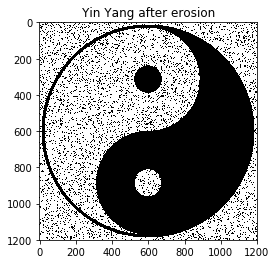

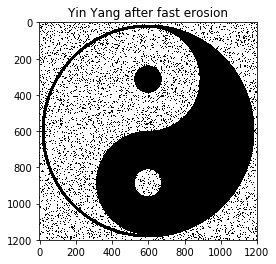

In [5]:
# A compléter
# Application de l'érosion sur l'image et affichage du résultat

erode_yinyang = chronometrer(erosion,"Erosion",yinyang,kernel_cross_3_3)
erode_faster_yinyang = chronometrer(erosion_faster,"Fast Erosion",yinyang,kernel_cross_3_3)
afficher(erode_yinyang,'gray','Yin Yang after erosion')
afficher(erode_faster_yinyang,'gray','Yin Yang after fast erosion')

**_Réponse :_**

---
**2.**

Passons maintenant à la dilatation. Dans le cadre des images binaires, la dilatation d'une image I par un kernel K consiste en l'opération suivante :

$ {\delta}_K(I) = \{ x|K_{x} \cap I \neq \emptyset \}$

C'est-à-dire, l'union ds points x tels que $K_{x}$ intersecte I avec K centré en x.

Dans ce principe, développez la fonction de dilatation d'une image I par un kernel K.

In [6]:
# A compléter
# Implémentation de la fonction de dilatation

def dilatation(I,K):
    height,width = I.shape
    k_height,k_width = K.shape
    output = np.zeros((height,width),dtype=np.uint8)
    I_extended = np.zeros((height+k_height-1,width+k_width-1),dtype=np.uint8)
    I_extended[k_height//2:k_height//2+height,k_width//2:width+k_width//2]=I
    for i in range(height):
        for j in range(width):
            imagette = I_extended[i:k_height+i,j:k_width+j]
            output[i,j] = np.any(imagette[K.astype(np.bool)])
    return output

def dilatation_faster(I,K):
    return np.any(np.stack([shift(I,(i-K.shape[0]//2,j-K.shape[1]//2),cval=np.NaN) for i,j in itertools.product(range(K.shape[0]),range(K.shape[1]))])[K.astype(np.bool).reshape(-1),:,:].astype(np.bool),axis=0)

Appliquez la dilatation sur votre image bruitée avec le kernel en croix 3X3 et affichez le résultat. Analysez le résultat.

Temps d'exécution de Erosion : 13.49 sec
Temps d'exécution de Fast Erosion : 1.47 sec


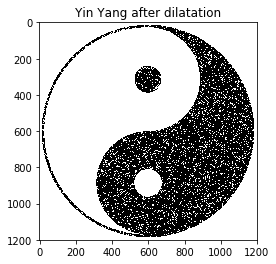

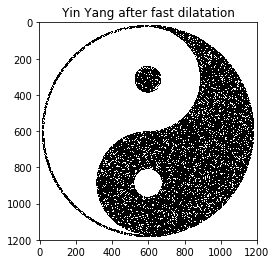

In [7]:
# A compléter
# Application de la dilatation sur l'image et affichage du résultat

dilate_yinyang = chronometrer(dilatation,"Erosion",yinyang,kernel_cross_3_3)
dilate_faster_yinyang = chronometrer(dilatation_faster,"Fast Erosion",yinyang,kernel_cross_3_3)
afficher(dilate_yinyang,'gray','Yin Yang after dilatation')
afficher(dilate_faster_yinyang,'gray','Yin Yang after fast dilatation')

**_Réponse :_** 

---
**3.**

Passons à la vitesse supérieure ! Développez maintenant la fonction d'ouverture, qui consiste tout simplement d'une érosion puis d'une dilatation pour une image I avec un kernel K.

In [8]:
# A compléter
# Implémentation de la fonction d'ouverture

def opening(I,K):
    return dilatation_faster(erosion_faster(I,K),K)

Appliquez l'ouverture sur votre image bruitée avec le kernel en croix 3X3 et affichez le résultat. Analysez le résultat.

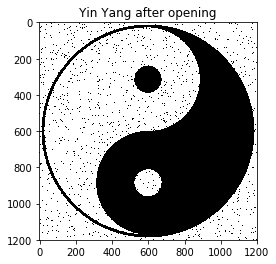

In [9]:
# A compléter
# Application de l'ouverture sur l'image et affichage du résultat

opened_yinyang = opening(yinyang,kernel_cross_3_3)
afficher(opened_yinyang,'gray','Yin Yang after opening')

**_Réponse :_** 

---
**4.**

Développez maintenant la fonction de fermeture, qui consiste tout simplement d'une dilatation suivie d'une érosion pour une image I avec un kernel K.

In [10]:
# A compléter
# Implémentation de la fonction de fermeture

def closing(I,K):
    return erosion_faster(dilatation_faster(I,K),K)

Appliquez la fermeture sur votre image bruitée avec le kernel en croix 3X3 et affichez le résultat. Analysez le résultat.

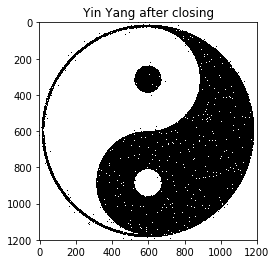

In [11]:
# A compléter
# Application de la fermeture sur l'image et affichage du résultat

closed_yinyang = closing(yinyang,kernel_cross_3_3)
afficher(closed_yinyang,'gray','Yin Yang after closing')

**_Réponse :_** 

---
**5.**

Enfin, pour finir la partie développement, déveoppez la fonction de gradient morphologique, qui est la différence entre la dilatation et l'érosion d'une image I par un kernel K.

In [12]:
# A compléter
# Implémentation de la fonction de gradient morphologique

def morph_gradient(I,K):
    return dilatation_faster(I,K).astype(np.uint8)-erosion_faster(I,K).astype(np.uint8)

Appliquez l'ouverture sur votre image bruitée avec le kernel en croix 3X3 et affichez le résultat.

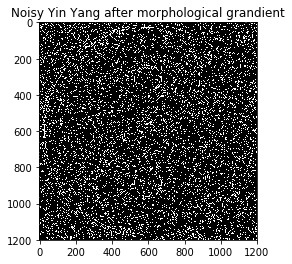

In [13]:
# A compléter
# Application du gradient morphologique sur l'image et affichage du résultat

morph_grad_yinyang = morph_gradient(yinyang,kernel_cross_3_3)
afficher(morph_grad_yinyang,'gray','Noisy Yin Yang after morphological grandient')

Le résultat n'est pas terrible ? C'est normal, car notre image est assez bruitée, donc on ne voit pas l'intérêt du gradient morphologique. Essayez plutôt avec l'image yin_yang.png.

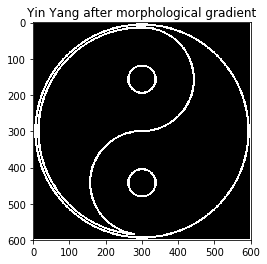

In [14]:
# A compléter
# Application du gradient morphologique sur l'image non bruitée et affichage du résultat

yinyang2 = cv2.imread(path_base+'yin_yang.png',0)
afficher(morph_gradient(yinyang2,kernel_ellipse_7_7),'gray','Yin Yang after morphological gradient')

## Ex. 2 : Bon, passons à un cas pratique maintenant ;)



Attention, cet exercice n'est pas évident. Cela veut dire qu'il n'y a pas une bonne solution, à vous de voir comment procéder pour atteindre votre objectif ! Bon courage ! 

*_Signé Robin du passé qui a passé un certain temps pour que l'exercice soit faisable..._*

Ici, on va prendre un cas pratique. Chargez l'image QRcode.png et affichez la.

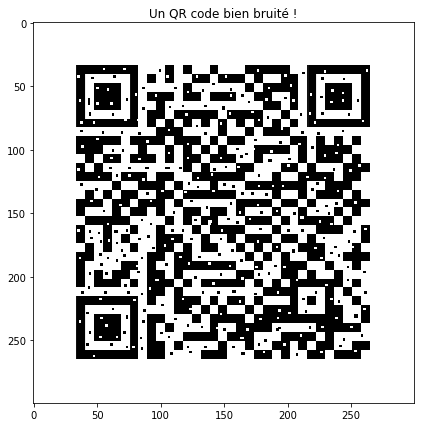

In [15]:
# A compléter
# Chargement et affichage de l'image de QRCode

qrcode = cv2.imread(path_base+'QRcode.png',0)
afficher(qrcode,'gray',"Un QR code bien bruité !",figsize=(7,7))

Comme vous pouvez le voir, le QR code est assez bruité, et un scanner classique de QR code pourra difficilement identifier le QR code. L'objectif ici est donc d'améliorer la qualité du QR code en éliminant le bruit présent grâce aux algorithmes de Morphologie Mathématique vues précédemment. Histoire d'être un chouilla plus rapide dans l'exécution, je vous conseille fortement d'utiliser la fonction proposée par OpenCV : cv2.morphologyEx.

Pas de métrique, ni de comparaison de temps d'exécution cette fois, je veux juste que vous arriviez à scanner le QR code :D

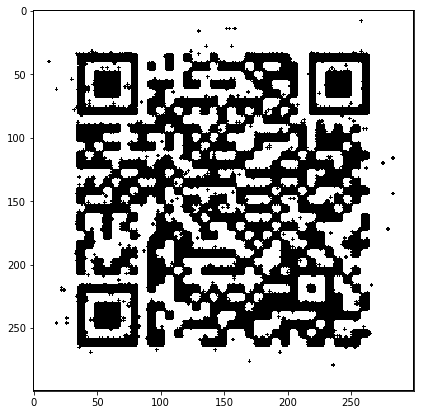

In [16]:
# A compléter
# Traitement du QR Code pour qu'il soit scannable

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
qr_code_traite = closing(opening(qrcode,kernel),kernel)
afficher(qr_code_traite,'gray',figsize=(7,7))

## Rendu de TP
Le rendu qui vous est demandé pour les TP de TIM est la version HTML de ce notebook. Pour l'obtenir: Fichier, télécharger au format, HTML (.html). Avant d'exporter en HTML, veuillez relancer tout votre notebook : Kernel, Redémarrer le kernel et exécuter toutes les cellules